In [1]:
import lasio
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

### Depth-Based Data

In [2]:
pd.set_option("display.max_columns", None)
las = lasio.read("../diskos_data.LAS")
depth_data = las.df()
stats = depth_data.describe().transpose()
stats

,count,mean,std,min,25%,50%,75%,max
RHOB,2294.0,2.145312,0.133872,1.309246,2.115185,2.150205,2.217806,2.886207
BPHI,2162.0,41.005267,7.310804,19.924141,36.540958,41.326406,44.762230,80.352493
P40L_ECO,1933.0,0.973341,0.710898,0.467671,0.647580,0.732961,0.933436,5.239871
PEF,2294.0,9.752063,15.401062,2.132450,3.130805,3.606515,4.169383,90.225693
PER,2294.0,9.646467,15.370371,1.913227,3.124626,3.568846,4.133229,90.454903
...,...,...,...,...,...,...,...,...
P28L_ARC,7044.0,4.419646,49.666948,0.304619,1.124266,1.263457,3.005781,1000.000000
ROBR,2294.0,2.143994,0.139154,1.301863,2.114367,2.149808,2.216689,2.891587
ROBB,2294.0,2.148449,0.136109,1.286918,2.114715,2.151815,2.221412,2.886207
DCVE,2294.0,9.311618,1.865704,8.285522,8.514646,8.590399,8.672230,15.250000


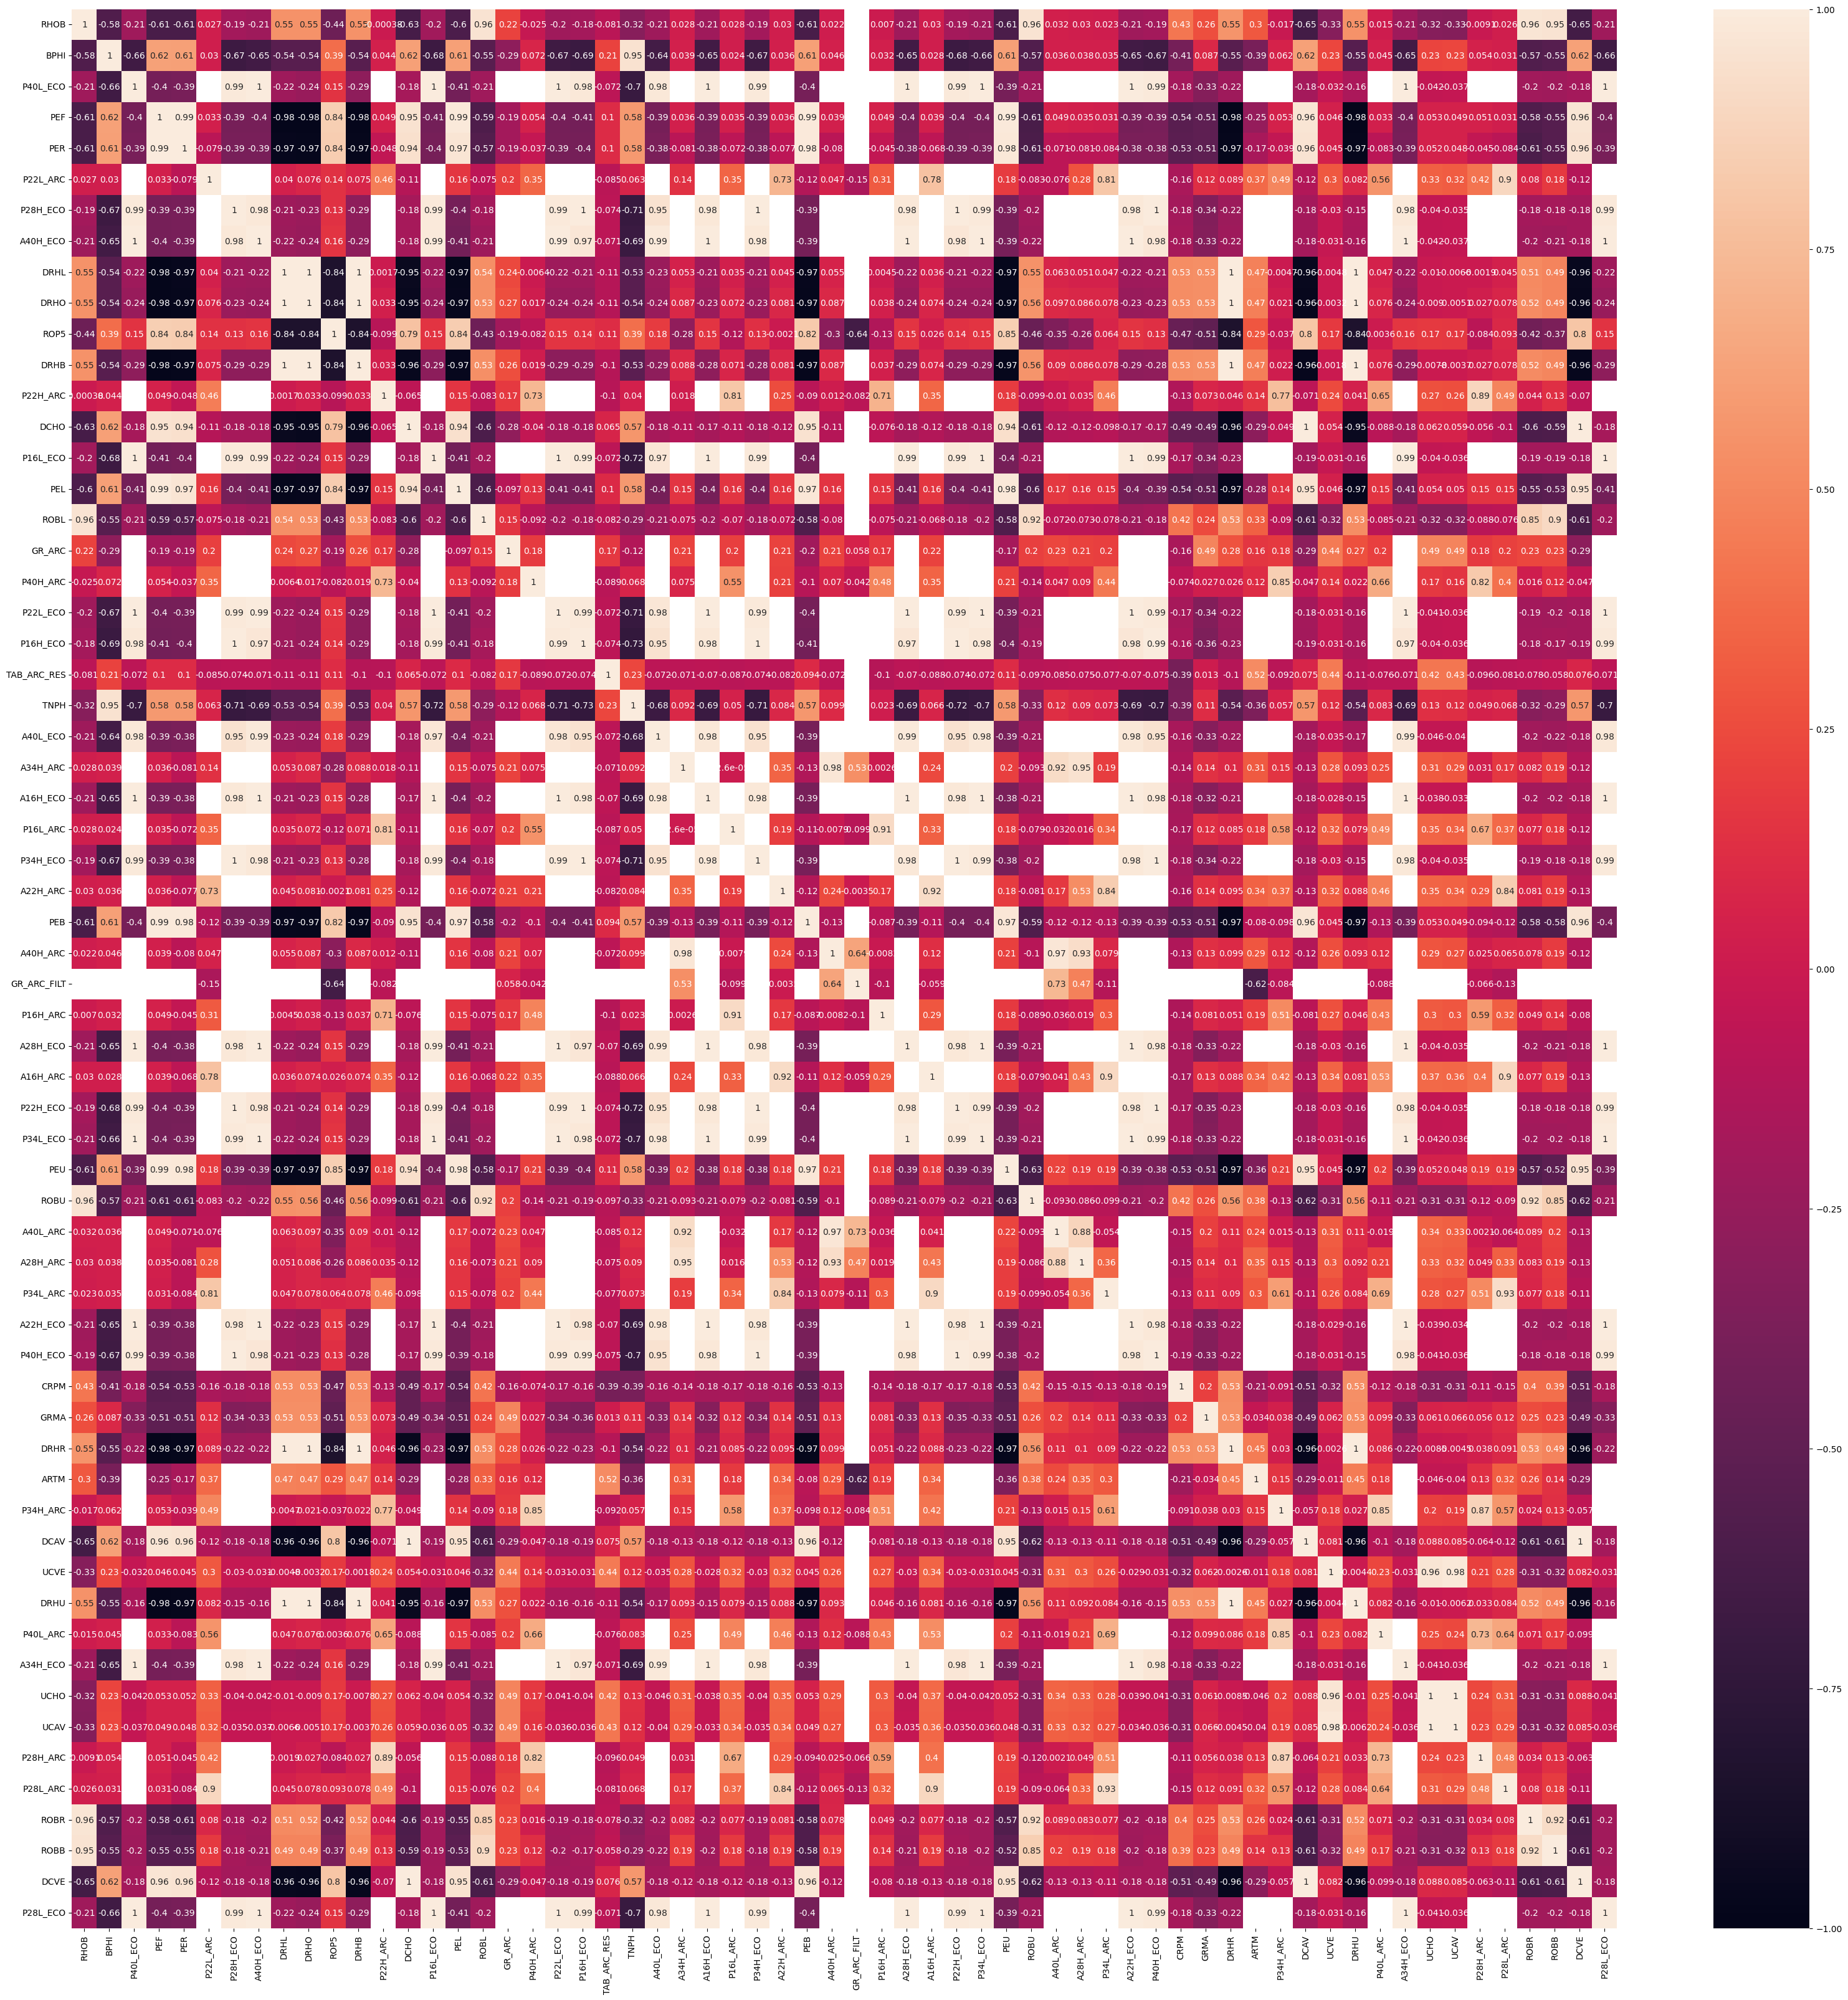

In [12]:
plt.figure(figsize=(40,40))

heatmap = seaborn.heatmap(depth_data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)
plt.show()

In [24]:
# Only the upper triangular part of the correlation matrix is necessary
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

corrs = get_top_abs_correlations(depth_data)
filter = lambda x: x >= 0.995
corrs[filter(corrs)]

DCAV      DCVE        0.999910
P34L_ECO  P28L_ECO    0.999734
A28H_ECO  A34H_ECO    0.999713
P28H_ECO  P34H_ECO    0.999694
P22L_ECO  P28L_ECO    0.999648
                        ...   
DCHO      DCAV        0.995687
P40L_ECO  P16L_ECO    0.995625
          A16H_ECO    0.995488
DCHO      DCVE        0.995420
P16L_ECO  A22H_ECO    0.995270
Length: 64, dtype: float64

### Time-Based Data 

In [8]:
las = lasio.read("../time_based_diskos.LAS")
time_data = las.df()
stats = time_data.describe().transpose()
stats

,count,mean,std,min,25%,50%,75%,max
DEPTH,19336.0,3532.189496,383.213672,1849.60303,3382.171880,3679.58325,3734.674867,3782.40112
BLKP,19337.0,14.938987,10.073982,-0.82517,5.921630,14.40047,24.302150,30.67318
GR,12309.0,80.320318,31.506559,2.04633,77.189970,82.37666,84.930190,1421.29000
CRPM,1191.0,125.502099,27.437902,0.00000,103.000000,135.00000,144.000000,255.00000
STICK,1192.0,103.922819,70.024338,0.00000,51.000000,87.00000,144.000000,321.00000
SHKRSK,1283.0,0.010912,0.136388,0.00000,0.000000,0.00000,0.000000,3.00000
APRS,1306.0,414.144525,77.938707,0.55158,411.065400,412.78910,414.650700,1861.44700
Q_TEMP,1297.0,93.036237,13.436502,0.00000,91.000000,93.00000,99.000000,203.00000
ECD,1304.0,1.587142,0.295702,0.00334,1.570747,1.57652,1.581552,7.15004


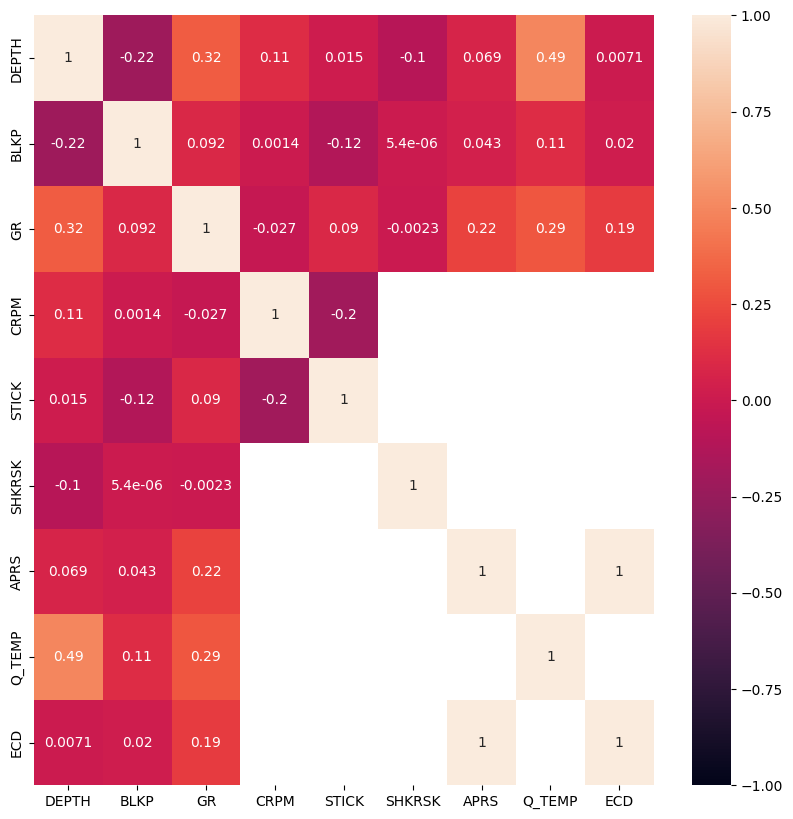

In [10]:
plt.figure(figsize=(10,10))
seaborn.heatmap(time_data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1)
plt.show()